In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [9]:
paths = ['dataset/']


In [10]:
def imshow(img):
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    ax.imshow(img, cmap="gray")

In [11]:
possible_labels = os.listdir(os.path.join(paths[0]))
possible_labels.pop(0)
possible_labels

['closed', 'open']

In [12]:
data = []
for i, path in enumerate(paths):
    for label_int, label_string in enumerate(possible_labels):
        filenames = glob.glob(path + label_string + '/*.jpg')
        for filename in filenames:
            img = cv.imread(filename, cv.IMREAD_GRAYSCALE)
            data.append([label_int, cv.resize(img, (224,224))])
print(len(data))

3402


In [13]:
import random
random.Random(0).shuffle(data)

x_train = []
y_train = []
x_test = []
y_test = []

for i, sample in enumerate(data):
    label, img = sample[0], sample[1]
    if i <= 0.7 * len(data):
        x_train.append(img)
        y_train.append(label)
    else:
        x_test.append(img)
        y_test.append(label)

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [16]:
print(x_train.shape)
print(x_test.shape)

(2382, 224, 224)
(1020, 224, 224)


In [17]:
print(y_train.shape)
print(y_test.shape)

(2382, 2)
(1020, 2)


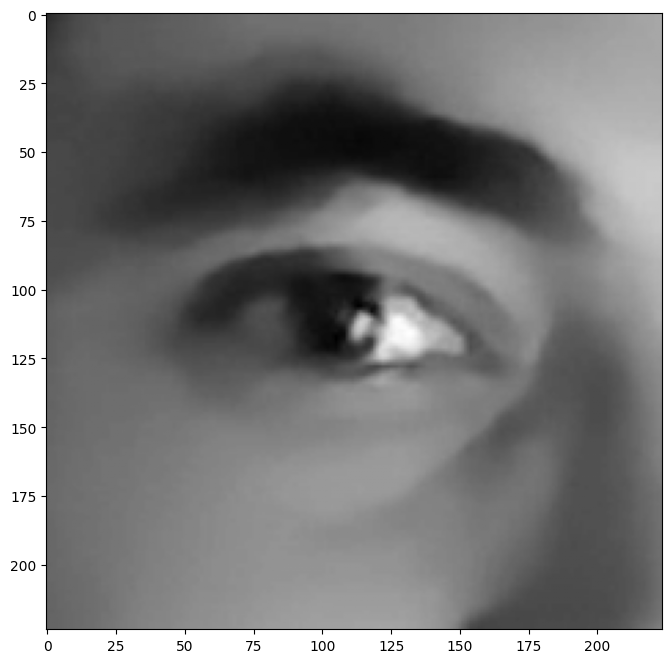

In [18]:
imshow(x_train[0])

# Red neuronal

In [24]:
callback = EarlyStopping(monitor='loss', patience=3)

In [45]:
def model1():
    model = Sequential()
    model.add(Conv2D(32,(3,3), input_shape=(224, 224, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Conv2D(16,(3,3), input_shape=(224, 224, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Conv2D(16,(3,3), input_shape=(224, 224, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Conv2D(8,(2,2), input_shape=(224, 224, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Flatten())
    model.add(Dense(30, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [46]:
model1 = model1()
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 72, 72, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 22, 22, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 6, 6, 8)        │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 2, 2, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 30)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,836 (34.52 KB)

 Trainable params: 8,836 (34.52 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model1.fit(x_train, y_train, epochs=10, batch_size=64, callbacks=[callback])

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.5422 - loss: 0.6900
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - accuracy: 0.7198 - loss: 0.5872
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.9519 - loss: 0.1664
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step - accuracy: 0.9685 - loss: 0.0817
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.9593 - loss: 0.0915
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 238ms/step - accuracy: 0.9751 - loss: 0.0566
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - accuracy: 0.9729 - loss: 0.0621
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.9810 - loss: 0.0530
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.9868 - loss: 0.0383
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step - accuracy: 0.9767 - loss: 0.0586


In [48]:
model1.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9889 - loss: 0.0355


[0.05044801905751228, 0.9862744808197021]

In [49]:
prediction = model1.predict(x_test[1:2])
prediction_label = prediction.argmax()
print(f'Prediction: {prediction_label}')
print(f'Etiqueta real: {y_test[1].argmax()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: 0
Etiqueta real: 0


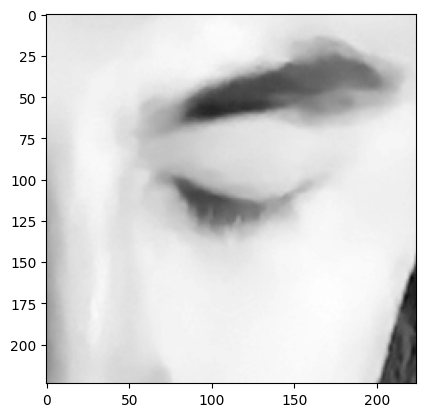

In [50]:
plt.imshow(x_test[1], cmap='gray')

In [51]:
model1.save("models/open-closed-eyes-v4.h5")